<a href="https://colab.research.google.com/github/spctr01/10DayMLChallenge/blob/master/day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle

#coping api token &permission to execute &download dataset
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [3]:
#downloading kaggle dataset
!kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 47.2MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.85MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 51.6MB/s]


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [5]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#no/ of  null values in each column
print(data.isna().sum(), end=' \n -------------------- \n')
data.dtypes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
 -------------------- 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Visualizing

In [7]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

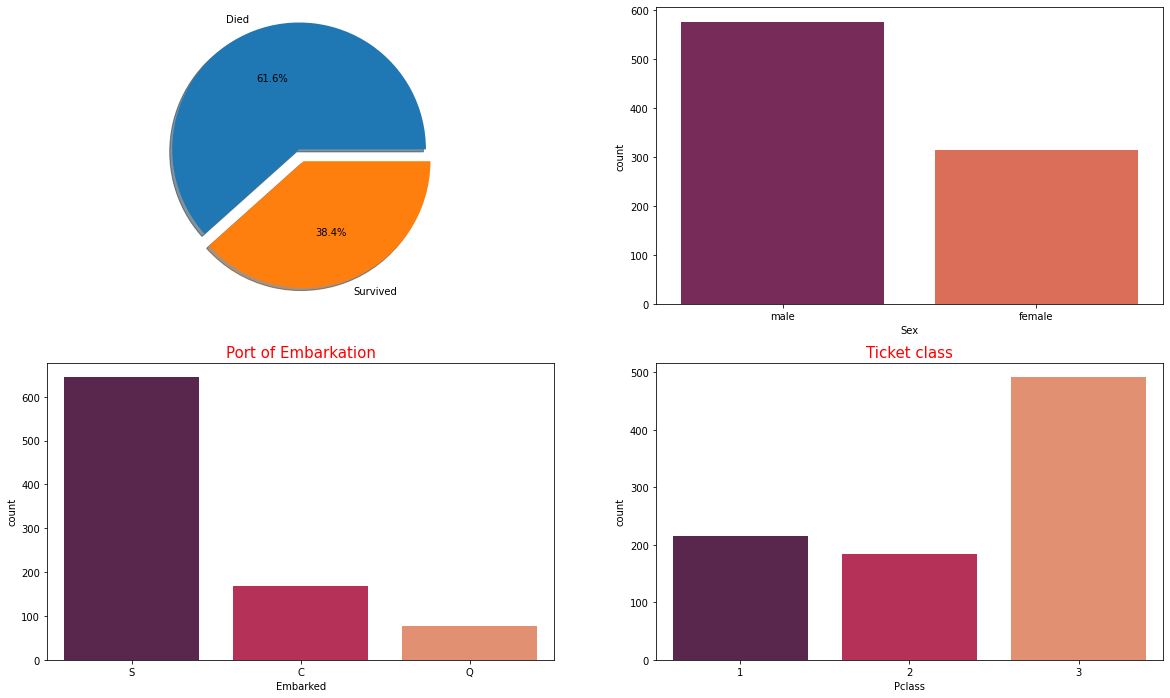

In [165]:
# # visualizing how many survived and how many doesnt
# #  0=No 1= Yes


sizes=  [data['Survived'].value_counts().values]
labels = ['Died','Survived']
explode = (0.1,0)

fig, ax = plt.subplots(2,2, figsize=(20,12))
ax[0,0].pie(sizes, labels=labels,
       explode = explode, 
       shadow= True,  
       autopct='%1.1f%%')
ax[0,0].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.



#total no of male and female on ship

sns.countplot('Sex', data=data, palette="rocket", ax = ax[0,1])

ax[1,0].set_title('Port of Embarkation',color= 'red', fontsize=15)
sns.countplot('Embarked', data= data,palette="rocket", ax= ax[1,0])

ax[1,1].set_title('Ticket class',color= 'red', fontsize=15)
sns.countplot('Pclass', data= data,  palette="rocket", ax= ax[1,1])
plt.show();






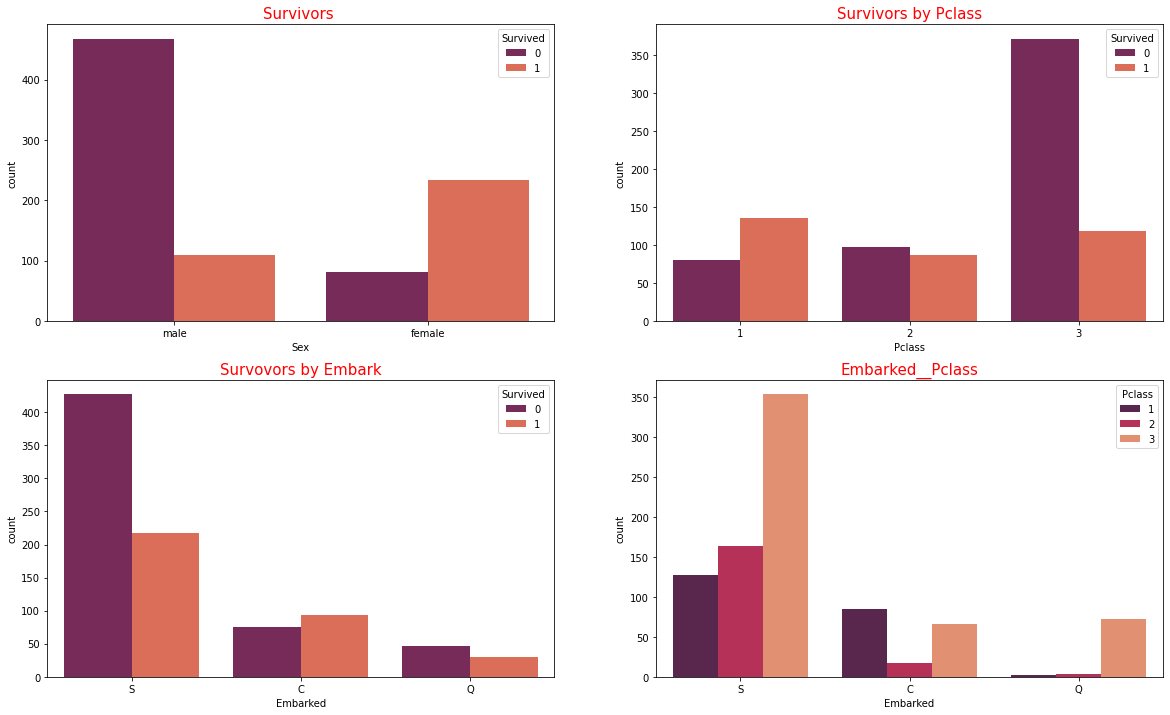

In [167]:
# visualizing survivors
fig , ax = plt.subplots(2,2, figsize=(20,12))

ax[0,0].set_title('Survivors ',color= 'red', fontsize=15)
sns.countplot('Sex', data= data, hue='Survived', palette="rocket", ax= ax[0,0])

ax[0,1].set_title('Survivors by Pclass',color= 'red', fontsize=15)
sns.countplot('Pclass', data= data, hue='Survived', palette="rocket", ax= ax[0,1])

ax[1,0].set_title('Survovors by Embark',color= 'red', fontsize=15)
sns.countplot('Embarked', data= data, hue='Survived', palette="rocket", ax= ax[1,0])


ax[1,1].set_title('Embarked__Pclass',color= 'red', fontsize=15)
sns.countplot('Embarked', data= data, hue='Pclass', palette="rocket", ax= ax[1,1])



plt.show();

# 1. Selecting the features that can be  responsible for survival chances & Preprocessing only those columns.

In [0]:
df = data[['Survived', 'Sex', 'Age', 'Cabin']] 
df

,Survived,Sex,Age,Cabin
0,0,male,22.0,NaN
1,1,female,38.0,C85
2,1,female,26.0,NaN
3,1,female,35.0,C123
4,0,male,35.0,NaN
...,...,...,...,...
886,0,male,27.0,NaN
887,1,female,19.0,B42
888,0,female,NaN,NaN
889,1,male,26.0,C148


In [0]:
#filling age data with the average of the column (age)
data['Age'].fillna(data['Age'].mean(), inplace = True)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64